# **Final Project Grup 1**

Model ini di bangun oleh:

1. Fahri Arman Rasyad

2. Harun

3. Maulana Achsan

4. Muhammad Aliansyah Ramadhan

5. Muhammad Ashar Ihsan

Kelas: RMT - 035

===================================================================================================

## **1.  Introduction**

Cafe merupakan tempat yang sering digunakan untuk berkumpul dan bercengkerama baik itu dilakukan oleh anak muda, profesional, mahasiswa, dan banyak kalangan yang memakai kafe. Dalam pemilihan kafe banyak orang orang yang kecewa karena kafe tersebut mungkin tidak sesuai dengan harapan apa yang mereka inginkan. Oleh karena itu pada notebook ini kita akan mencoba untuk membuat model Natural Language Processing (NLP) dengan harapan akan sesuai dengan keinginan dari user.

Ekspektasi model ini akan.
1. User memasukkan filter daerah dan fasilitas.
2. User akan memasukkan 3 kata kunci yang mereka inginkan sehingga akan keluar beberapa rekomendasi cafe sesuai dengan tempat fasilitas dan 3 kata kunci terpilih.  

Contoh .

Filter = (Pasar Minggu, 50000 )
Fasilitas = (Wifi, Parkir)
Keyword = (Nyaman, Tenang, Murah)

Output

1. Cafe Janji Jiwa
2. Kopi Tuku
3. Excelso.


===================================================================================================

## **2. Import Libraries**

Pada bagian ini, kami akan memastikan bahwa pysastrawi telah terinstall

In [3]:
!pip install pysastrawi

In [4]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud
import gensim
from gensim.models import Word2Vec

print('Libraries has been imported')


Libraries has been imported


Library telah berhasil di import

==============================================================================================

Pada bagian ini, kami akan menggunakan stopwords dari NLTK untuk preproccessing data, "stopwords" di perlukan untuk memproses kata kata yang tidak di perlukan oleh model yang dapat membuat model menjadi kacau.

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alew\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

==============================================================================================

## **3. Load Data**

Sebelumnya, dataset yang telah di proses telah di upload ke dalam platform github, dan akan di load menggunakan library pandas.

In [6]:
# Loading dataset
df = pd.read_csv('https://raw.githubusercontent.com/FTDS-assignment-bay/p2-final-project-hikopi/refs/heads/main/Data/Data%20Cleaning/data_clean.csv')
df.sample(1)

,title,kota,full_address,rate,cuisine,price_from,price_till,url,opening_hours,wifi_available,smoking_area_available,outdoor_seat_available,full_time_available,vip_room_available,reservation_available,parking_area_available,review
1452,Starbucks SCBD,Jakarta,"SCBD, Pacific Place Mall, Lantai 1, Galeries L...",3.86,Kafe,50000.0,100000.0,https://pergikuliner.com/restaurants/jakarta/s...,Senin - Minggu (10:00 - 22:00),True,False,False,False,False,False,True,NEW!!!Gingerbread latte edisi holiday. Beli uk...


data telah berhasil di definisikan dan terlihat sudah ada sample data seperti di atas.

In [7]:
df.shape

(1500, 17)

terlihat disini ada 1500 baris dan 17 kolom.

===========================================================================================

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   1500 non-null   object 
 1   kota                    1500 non-null   object 
 2   full_address            1500 non-null   object 
 3   rate                    1500 non-null   float64
 4   cuisine                 1500 non-null   object 
 5   price_from              1500 non-null   float64
 6   price_till              1500 non-null   float64
 7   url                     1500 non-null   object 
 8   opening_hours           1500 non-null   object 
 9   wifi_available          1500 non-null   bool   
 10  smoking_area_available  1500 non-null   bool   
 11  outdoor_seat_available  1500 non-null   bool   
 12  full_time_available     1500 non-null   bool   
 13  vip_room_available      1500 non-null   bool   
 14  reservation_available   1500 non-null   

Pada hasil di atas, terlihat bahwa nama dari masing masing kolom.

=============================================================================================

Tabel atas sudah terlihat bahwa tidak ada null value meskipun demikian akan kita cek ulang nanti. kita lihat pada kolom rate bentuk data sudah menjadi float dan pada kolom fasilitas misalkan vip_room sudah berbentuk boolean.  title itu menunjukkan nama dari kafe nya.

In [9]:
df.isna().sum()

title                     0
kota                      0
full_address              0
rate                      0
cuisine                   0
price_from                0
price_till                0
url                       0
opening_hours             0
wifi_available            0
smoking_area_available    0
outdoor_seat_available    0
full_time_available       0
vip_room_available        0
reservation_available     0
parking_area_available    0
review                    0
dtype: int64

==============================================================================================

## **4. Exploratory Data Analysis (EDA)**

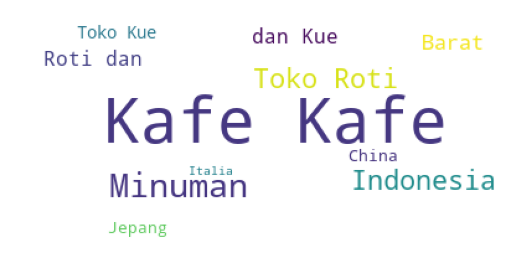

In [10]:
corpus = " ".join(df['cuisine'])
word_cloud = WordCloud(max_words=100, background_color='white', min_font_size=10).generate(corpus)
img = word_cloud.to_image()

fig = plt.figure(1)
plt.imshow(img)
plt.axis('off')
plt.show()

Kita tampilkan jenis makanan yang sering terlihat dalam kolom cuisine. Tampilan akan berbentuk sebagai wordcloud. Terlihat kafe sudah menjadi hal yang paling sering muncul pada word cloud. Meskipun terlihat pada wordcloud masih muncul kata yang kemungkinan tidak menunjukkan kafe. Misalkan secara harfiah toko kue dan kafe itu berbeda. Namun data yang kita dapat sudah kita filter menjadi kafe pada dataset sumber. Sehingga kemungkinan itu adalah toko kue yang menjual kopi (penjelasan masuk akalnya)

==============================================================================================

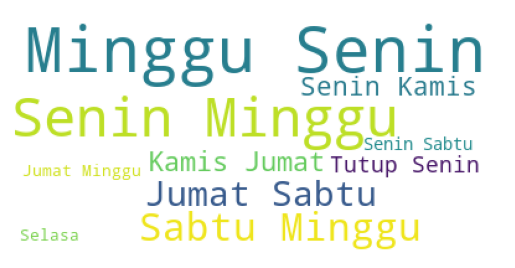

In [11]:
corpus = " ".join(df['opening_hours'])
word_cloud = WordCloud(max_words=100, background_color='white', min_font_size=10).generate(corpus)
img = word_cloud.to_image()

fig = plt.figure(1)
plt.imshow(img)
plt.axis('off')
plt.show()

Rata-rata kafe buka di semua hari. Terlihat kata senin sampai minggu itu masuk kategori kata yang berukuran besar.

==============================================================================================

In [12]:
# Group by kota dan price_from, price_till untuk melihat statistiknya
price_stats = df.groupby('kota')[['price_from', 'price_till']].describe().T
price_stats

kota                    Jakarta
price_from count    1500.000000
           mean    43233.333333
           std     40828.791504
           min         0.000000
           25%         0.000000
           50%     50000.000000
           75%     50000.000000
           max    200000.000000
price_till count    1500.000000
           mean   105466.666667
           std     63003.400765
           min     50000.000000
           25%     50000.000000
           50%    100000.000000
           75%    100000.000000
           max    400000.000000

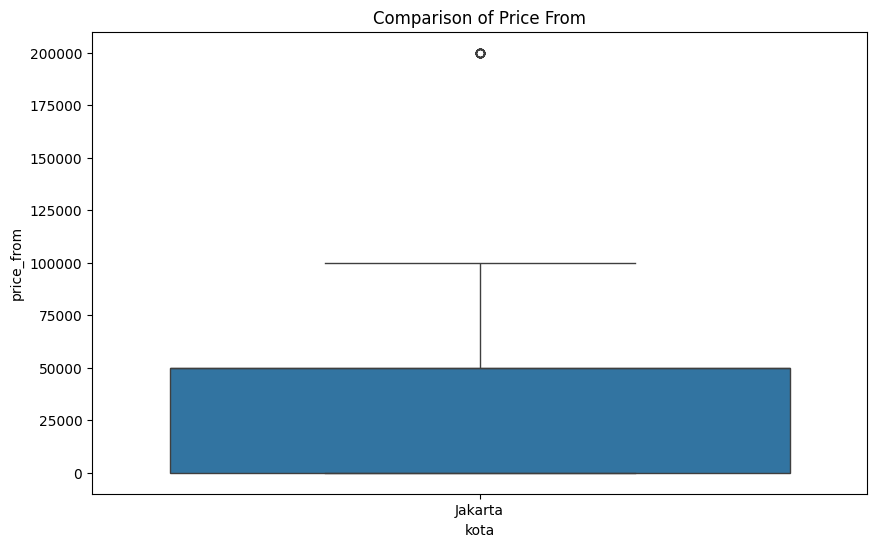

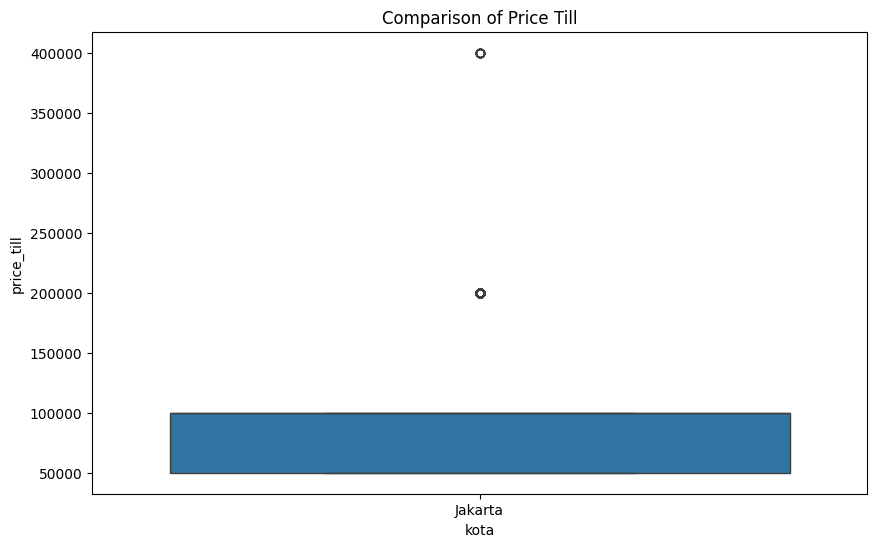

In [13]:
# Plot price_from
plt.figure(figsize=(10, 6))
sns.boxplot(x='kota', y='price_from', data=df)
plt.title('Comparison of Price From')
plt.show()

# Plot price_till
plt.figure(figsize=(10, 6))
sns.boxplot(x='kota', y='price_till', data=df)
plt.title('Comparison of Price Till')
plt.show()

Kafe-kafe di Jakarta menunjukkan harga rata-rata price_from sebesar Rp43.233 dan price_till sebesar Rp105.466. Median untuk price_from dan price_till masing-masing adalah Rp50.000 dan Rp100.000. Ini berarti sebagian besar kafe memulai harga di sekitar Rp50.000, dengan harga tertinggi yang biasa ditemukan di sekitar Rp100.000. Harga rata-rata menunjukkan bahwa meskipun ada variasi, sebagian besar kafe cenderung menjaga harga dalam rentang yang cukup terjangkau.

==============================================================================================

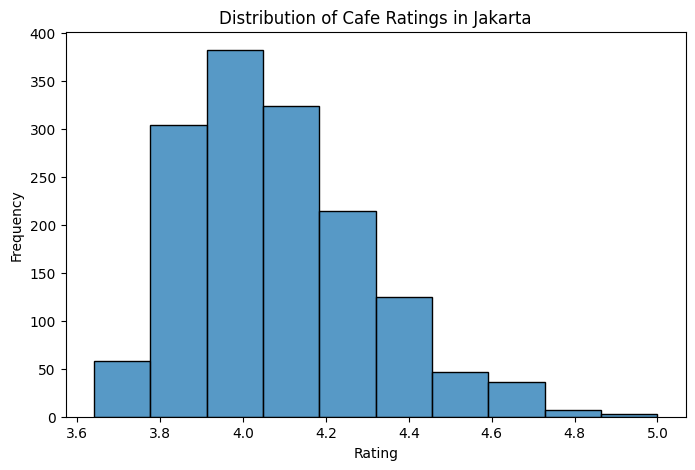

In [14]:
# Plot distribusi rating tiap tempat
plt.figure(figsize=(8, 5))
sns.histplot(df['rate'].dropna(), bins=10)
plt.title('Distribution of Cafe Ratings in Jakarta')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Sebagian besar cafe di Jakarta memiliki rating antara 4.0 hingga 4.5, menunjukkan bahwa cafe umumnya mendapatkan penilaian yang baik.

==============================================================================================

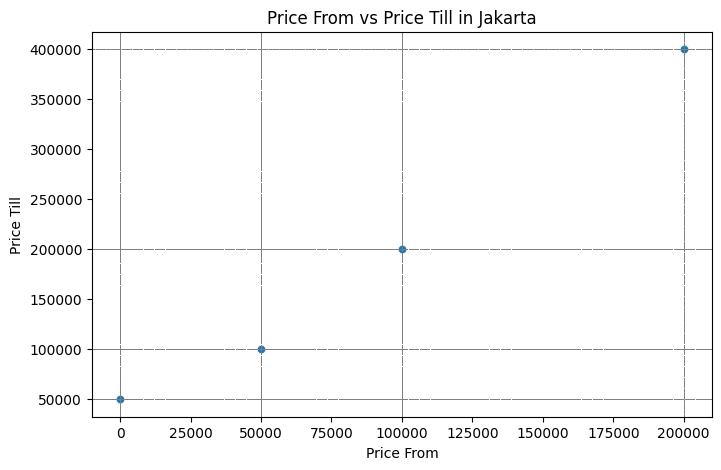

In [15]:
# Scatter plot of price_from vs price_till
plt.figure(figsize=(8, 5))
sns.scatterplot(x='price_from', y='price_till', data=df)
for index, row in df.iterrows():
    plt.axhline(y=row['price_till'], color='gray', linestyle='--', linewidth=0.5)
    plt.axvline(x=row['price_from'], color='gray', linestyle='--', linewidth=0.5)
plt.title('Price From vs Price Till in Jakarta')
plt.xlabel('Price From')
plt.ylabel('Price Till')
plt.show()

Sebagian besar cafe di Jakarta memiliki harga maksimum yang tidak jauh berbeda dari harga minimum, dengan beberapa cafe yang memiliki rentang harga yang lebih lebar.

==============================================================================================

In [16]:
# Count the number of occurrences of each cuisine
cuisine_distribution = df['cuisine'].value_counts().reset_index()
cuisine_distribution.columns = ['Cuisine Type', 'Count']
cuisine_distribution

,Cuisine Type,Count
0,Kafe,1329
1,Minuman,50
2,Indonesia,22
3,"Toko Roti, Kafe",13
4,"Toko Roti dan Kue, Kafe",12
5,Barat,9
6,China,9
7,"Toko Kue, Kafe",8
8,"Kafe, Singapura",4
9,Toko Roti dan Kue,4


Insight:
- Dominasi Kafe:

Kafe merupakan jenis tempat makan yang sangat dominan di Jakarta, dengan total 1.329 entri. Jumlah ini sangat jauh di atas jenis cuisine lain. Hal ini bisa mengindikasikan bahwa tren nongkrong atau bersosialisasi di kafe sangat kuat di Jakarta. Kafe di Jakarta bisa saja beragam, dari yang menawarkan kopi hingga makanan ringan, yang menargetkan pasar muda dan profesional.

- Keanekaragaman Jenis Cuisine:

Meskipun kafe mendominasi, Jakarta tetap menawarkan keragaman cuisine, dengan jenis seperti Toko Roti (35), China (20), Jepang (15), dan Italia (12). Ini menunjukkan bahwa ada variasi pilihan makanan, meskipun jumlahnya tidak sebanyak kafe. Ini juga bisa menunjukkan bahwa restoran-restoran spesifik seperti ini lebih fokus pada niche pasar tertentu.

- Restoran Internasional di Jakarta:

Kehadiran cuisine Jepang, Italia, India, dan China menggambarkan preferensi masyarakat urban Jakarta yang mulai mengadopsi dan menggemari makanan internasional. Restoran jenis ini mungkin berada di area dengan target pelanggan kelas menengah ke atas atau berada di pusat perbelanjaan.

==============================================================================================

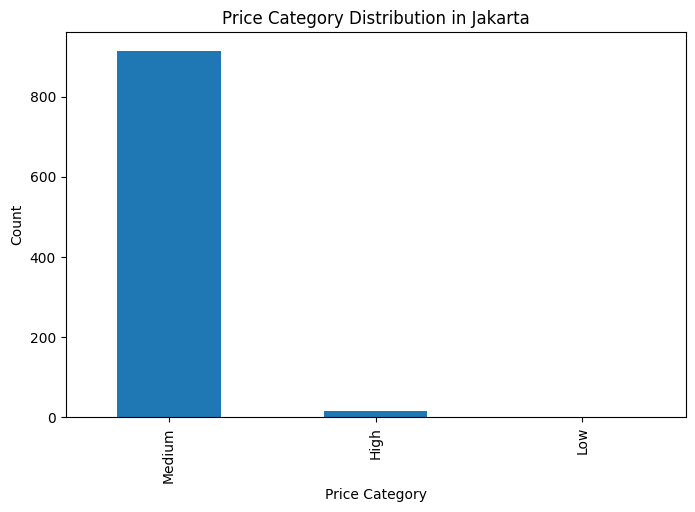

In [17]:
# Categorize cafes menggunakan price_from (merepresentasikan harga minimum yang dikenakan oleh cafe)
df['price_category'] = pd.cut(df['price_from'], bins=[0, 25000, 100000, 400000], labels=['Low', 'Medium', 'High'])

# Plot the distribution of price categories
plt.figure(figsize=(8, 5))
df['price_category'].value_counts().plot(kind='bar')
plt.title('Price Category Distribution in Jakarta')
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.show()

- Low Category (Rp0 - Rp25.000): Hanya sedikit cafe yang menawarkan harga di bawah Rp25.000. Ini menunjukkan bahwa cafe di Jakarta umumnya menetapkan harga yang cukup tinggi untuk layanan mereka.
- Medium Category (Rp25.000 - Rp100.000): Mayoritas cafe di Jakarta berada dalam rentang harga ini, yang mencerminkan tren harga yang terjangkau namun tidak terlalu murah.
- High Category (Rp100.000 - Rp400.000): Ada sejumlah cafe yang menetapkan harga minimum di atas Rp100.000, yang menunjukkan segmen pasar yang lebih premium.

==============================================================================================

## **5. Data Preprocessing**

Pada bagian ini, kami akan melakukan Data Preprocessing, hal ini di perlukan karena komputer tidak dapat menangani tulisan manusia, namun komputer akan mengganti masing masing kata menjadi vector menggunakan word2vec dan banyak lainnya di bawah.

==============================================================================================

Pada project ini, kami membutuhkan dataset dari luar yaitu "colloquial-indonesian-lexicon.csv" dan "formalize_word.csv". Dataset ini di perlukan untuk normalisasi dan mem formalisasi data agar dapat di baca oleh library pysastrawi

In [18]:
lexicon = pd.read_csv('https://raw.githubusercontent.com/FTDS-assignment-bay/p2-final-project-hikopi/refs/heads/main/Text%20Preproccessing/colloquial-indonesian-lexicon.csv')
formalize = pd.read_csv('https://raw.githubusercontent.com/FTDS-assignment-bay/p2-final-project-hikopi/refs/heads/main/Text%20Preproccessing/formalize_word.csv')

==============================================================================================

In [19]:
lexicon

,slang,formal,In-dictionary,context,category1,category2,category3
0,woww,wow,1,wow,elongasi,0,0
1,aminn,amin,1,Selamat ulang tahun kakak tulus semoga panjang...,elongasi,0,0
2,met,selamat,1,Met hari netaas kak!? Wish you all the best @t...,abreviasi,0,0
3,netaas,menetas,1,Met hari netaas kak!? Wish you all the best @t...,afiksasi,elongasi,0
4,keberpa,keberapa,0,Birthday yg keberpa kak?,abreviasi,0,0
...,...,...,...,...,...,...,...
15001,gataunya,tidak taunya,0,Ini kaya nenek2 ya beb gataunya agnezz @yugime...,akronim,0,0
15002,gtau,tidak tau,0,Stidaknya mrka may berkarya Dan berusaha yg tr...,akronim,abreviasi,0
15003,gatau,tidak tau,0,Ih gatau malu,akronim,0,0
15004,fans2,fan-fan,0,Jkt48 adalah tempat di mana sesama fans saling...,reduplikasi,naturalisasi,0


In [20]:
formalize

,Slang,Formal
0,bgs,bagus
1,jg,juga
2,Hy,hai
3,dlm,dalam
4,Mgkn,mungkin
5,krn,karena
6,hr,hari
7,dgn,dengan
8,utk,untuk
9,kek,seperti


In [21]:
# Melihat 10 data awal lexicon
dict_lexicon = pd.Series(lexicon.formal.values,index=lexicon.slang).to_dict()
dict_lexicon['brg'] = 'barang'
dict_lexicon['kw']='tiruan'
dict(list(dict_lexicon.items())[:10])

{'woww': 'wow',
 'aminn': 'amin',
 'met': 'selamat',
 'netaas': 'menetas',
 'keberpa': 'keberapa',
 'eeeehhhh': 'eh',
 'kata2nyaaa': 'kata-katanya',
 'hallo': 'halo',
 'kaka': 'kakak',
 'ka': 'kak'}

kita coba dulu pada kamus lexicon untuk beberapa terlihat memang kata-kata itu sudah menjadi lebih formal dibandingkan kata yang sebelumnya. misalkan kata aminn menjadi amin, kata amin ini cenderung lebih formal dibandingkan dengan yang mempunyai 2 huruf n. Ini biasanya karena elongasi atau mungkin typo dan pada saat kita chatting kepada teman atau pemberian review. Terkadang pemberian huruf-huruf tambahan setelah satu kata itu menunjukkan adanya urgensi yang bisa diperhatikan pembaca (kultur indonesia). Dengan menggunakan lexicon ini nantinya akan bisa lebih formal dan model bisa melakukan pemberian rekomendasi yang benar pada akhirnya.   

In [22]:
# Melihat 10 data awal
dict_formalize = pd.Series(formalize.Formal.values,index=formalize.Slang).to_dict()
dict(list(dict_formalize.items())[:10])

{'bgs': 'bagus',
 'jg': 'juga',
 'Hy': 'hai',
 'dlm': 'dalam',
 'Mgkn': 'mungkin',
 'krn': 'karena',
 'hr': 'hari',
 'dgn': 'dengan',
 'utk': 'untuk',
 'kek': 'seperti'}

Terlihat juga singkatan sudah menjadi kata-kata yang lebih formal. Sering orang indonesia menggunakan kata singkatan ketika texting (dalam konteks ini menulis review pada ranah sosial )

In [23]:
# copy dataset for safety reason
df1 = df.iloc[0:1500] # penggunaan iloc untuk copy

==============================================================================================

Sebelum melakukan preprocessing lanjutan kita mencoba untuk membuat copy dari dataset asli dan kemudian kita masukkan ke variabel baru.

setelah pembuatan copy dari dataset asli kita akan melakukan preprocessing untuk menghilangkan tanda titik, koma, emoji, angka dan lain sebagainya terlihat di fungsi setelah cell code ini.

In [24]:
# Fungsi untuk membersihkan teks
def clean_text(text):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        u"\U00002500-\U00002BEF"
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"
        u"\u3030"
                      "]+", re.UNICODE)

  #  text = text.lower()                                                                                 # membuat huruf menjadi kecil
    text = re.sub(emoj, '', text)                                                                       # remove emoji
    text = re.sub(r'(.)\1{2,}', r'\1', text)                                                            # mengubah huruf berulang diatas 2 kali menjadi 1 saja
    text = re.sub("[0-9]", " ", text)                                                                   # remove numbers
    text = re.sub("(Diterjemahkan oleh Google)", " ", text)
    text = re.sub("'s", " ", text)
    text = re.sub("[¹²³¹⁰ⁱ⁴⁵⁶⁷⁸⁹⁺⁻⁼⁽⁾ⁿ]", "", text)                                                     # remove power character
    text = re.sub("[^A-Za-z\s']","", text)
    text = re.sub("[^\w\s]*[_,.!?#&;:><+-/)/(\'\"]", " ", text)                                         # remove bukan string dan whitespace
    text = ' '.join([re.sub(r'nya', '', i) for i in text.split()])                                 # menghapus akhir kata 'nya' atau 'ny'
    text = " ".join(dict_lexicon[w] if w in dict_lexicon else w for w in text.split())                  # replace sesuai dict_lexicon
    text = " ".join(dict_formalize[w] if w in dict_formalize else w for w in text.split())              # replace sesuai dict_formalize
    text = re.sub(" +", " ", text.strip())                                                              # Remove unnecessary white space
    return text

def cleaned(df1):
    df1['text_preprocessed'] = df1['review'].apply(clean_text)
    return df1

Fungsi clean ini merupakan pembersihan dari review sehingga bisa lebih dibaca dan lebih formal. Terlihat penggunaan regex dan emoji-emoji dalam bentuk kodifikasi pada awal-awal.

setelah itu akan dipanggil di fungsi kedua dan pembuatan kolom baru pada df1 menjadi kolom baru bernama df1['textpreprocessed']

In [25]:
# pemakaian fungsi dari cleaned() yang sudah di definisikan
cleaned(df1)
# cek hasil dengan menggunakan slicing untuk 4 baris awal dan 2 kolom terakhir
df1.iloc[0:10,16:]

,review,price_category,text_preprocessed
0,"Food is excellent, absolutely delicious. The p...",Medium,Food is excellent absolutely delicious The pri...
1,"Buka dari pagi, komplir menu sarapan sampe mak...",Medium,Buka dari pagi komplir menu sarapan sampai mak...
2,"Toko tuku pertama kali di cipete ini, ternyata...",NaN,Toko tuku pertama kali di cipete ini terta sek...
3,*Review untuk pesan antar (via gojek) atau tak...,NaN,Review untuk pesan antar via gojek atau takeaw...
4,I need my morning coffee. Cuzz ke Kopi Selamat...,Medium,I need my morning coffee Cuzz ke Kopi Selamat ...
5,"Tempatnya bisa dibilang agak hidden, karena ma...",Medium,Tempat bisa dibilang agak hidden karena masuk ...
6,jenis makanan yang disediakan disini banyak ba...,High,jenis makanan yang disediakan disini bak bange...
7,🍴 Ini adalah pengalaman pertama kali buatku me...,Medium,Ini adalah pengalaman pertama kali buatku menc...
8,Nyaman bgt tempatnya buat kerja karena wifi ny...,Medium,Nyaman banget tempat buat kerja karena wifi ke...
9,"Pulang kerja makan disini, bisa parkir di depa...",Medium,Pulang kerja makan disini bisa parkir di depan...


Kita lihat dari baris ke-0 terlebih dahulu pada kolom (review) awal masih menggunakan tanda titik dan koma. pada kolom (text_preprocessed)sudah tidak ada titik dan koma. Perbedaan jelas juga terlihat pada baris nomor 7 ada emotikon garpu dan pisau pada kolom sampingnya sudah terlihat. Disini sudah cukup bukti bahwa fungsi kita berjalan dengan baik.

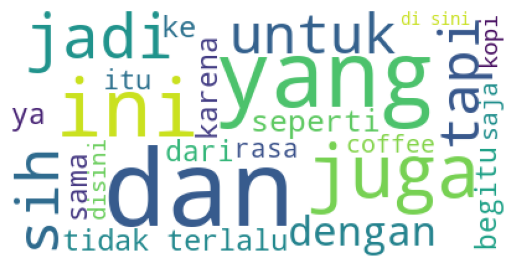

In [26]:
corpus = " ".join(df1['text_preprocessed'])
word_cloud = WordCloud(max_words=100, background_color='white', min_font_size=10).generate(corpus)
img = word_cloud.to_image()

fig = plt.figure(1)
plt.imshow(img)
plt.axis('off')
plt.show()

In [27]:
print("Jumlah kolom dalam df1:", df1.shape[1])

Jumlah kolom dalam df1: 19


In [28]:
for i in list(np.random.randint(0, len(df1), 1)):
    print('Original: ', df1.iloc[i, 16])
    print('Preprocessed: ', df1.iloc[i, 17])

Original:  Tertarik ngafe di sini karena menjual aneka hidangan khas Belanda. Memempati bangunan di pinggir jalan area Pasar Baru yang estetik. Kafenya cukup ramai didatangin pekerja di pagi hari. Uniknya, area toilet dihias kaset video dan mesin tik jadul. Pesen soft serve ice cream (25k), poffertjes (40k) dan Americano (30k). Semua menu ngga butuh waktu lama buat disajikan. Soft servenya lembut dengan rasa vanila dan ukuran cukup besar. Poffertjesnya otentik dan enak sekali dimakan dengan lelehan butter serta gula halus. Kopinya strong, cukup bisa melawan kantuk di mata.;Makanan di Ams&Dam cukup okay, tapi menunya perlu ditambahkan lagi. Namun, saya kurang puas dengan pelayanannya. Pada tanggal 25 Juni 2024 jam 15:34, saat hujan deras, kakak saya mau keluar dari mobil menuju resto. Saya tanya ke barista dan pelayan apakah bisa pinjam payung, mereka bilang tidak ada. Akhirnya, saya terpaksa keluar dalam hujan untuk ambil payung dari mobil dan membantu kakak saya keluar. Setelah basah-

Kita coba melihat dulu bagaimana kata original dan preprocessed dalam satu kata saja sehingga terlihat bagaimana bentuk perubahannya. Mungkin perubahan bisa berbeda karena disini kita menggunakan function random.randint. Tapi intinya sama seperti di atas. angka, emoticon, tanda baca, dsb (seperti fungsi diatas) itu sudah terhapus. Terlihat original merupakan review awal dan preprocessed adalah kata yang sudah dilakukan perlakuan menggunakan fungsi cleaned(df1)

In [29]:
# mmebuat Function
def stemmer_stopped(text):
    stemmer_factory = StemmerFactory()
    stemmer = stemmer_factory.create_stemmer()
    text = stemmer.stem(text)

    list_stopwords = set(stopwords.words('indonesian'))
    stopword_factory = StopWordRemoverFactory()
    stopwords_sastrawi = set(stopword_factory.get_stop_words())
    list_stopwords = list_stopwords.union(stopwords_sastrawi)

    text = " ".join(w if w not in list_stopwords else '' for w in text.split())
    text = re.sub(" +", " ", text.strip())
    return text

def clean_stopword(df1):
    df1['clean stopword'] = df1['text_preprocessed'].apply(stemmer_stopped)
    return df1

1. Fungsi stemmer_stopped(text):

- Fungsi ini melakukan stemming (mengubah kata ke bentuk dasarnya) dan menghapus stopwords (kata umum seperti "dan", "yang") dari teks.
- Proses:
  - Menggunakan Sastrawi untuk stemming.
  - Mengambil stopwords dari nltk dan Sastrawi.
  - Menghapus stopwords dari teks dan membersihkan spasi berlebih.
  - Hasil: Teks yang sudah di-stemming dan bebas dari stopwords.

2. Fungsi clean_stopword(df1):

- Fungsi ini menerapkan pembersihan stopwords pada kolom text_preprocessed di DataFrame df1.
- Hasilnya disimpan di kolom baru bernama clean stopword.
Mengembalikan DataFrame yang sudah diproses.

kesimpulan:

Kode ini adalah bagian dari proses pra-pemrosesan teks yang digunakan dalam analisis teks atau NLP (Natural Language Processing). Pertama, teks di-stemming untuk mendapatkan kata dasar, lalu stopwords dihapus untuk memperkecil jumlah kata yang tidak relevan dalam analisis. Fungsi clean_stopword mengotomatiskan penerapan fungsi ini pada DataFrame yang berisi teks.

Memanggil clean_stopword(df1):
- Memproses kolom text_preprocessed dalam DataFrame df1 dan menghasilkan kolom baru bernama clean stopword yang berisi teks yang sudah bersih dari stopwords dan sudah di-stemmed.

Memanggil df1.head():
- menampilkan 5 baris pertama dari DataFrame df1.
- Tujuan: Untuk memverifikasi hasil pembersihan stopwords dan stemming dengan melihat cuplikan dari DataFrame. Fungsi ini sangat berguna untuk mengecek apakah kolom clean stopword telah terisi dengan hasil teks yang sudah diproses.

In [30]:
clean_stopword(df1)
df1.head()

,title,kota,full_address,rate,cuisine,price_from,price_till,url,opening_hours,wifi_available,smoking_area_available,outdoor_seat_available,full_time_available,vip_room_available,reservation_available,parking_area_available,review,price_category,text_preprocessed,clean stopword
0,Kohicha Cafe Kelapa Gading,Jakarta,"Kelapa Gading, Ruko Gading Kirana, Blok A6A No...",4.36,Kafe,50000.0,100000.0,https://pergikuliner.com/restaurants/jakarta/k...,Senin - Minggu (08:00 - 22:00),True,True,True,False,False,True,True,"Food is excellent, absolutely delicious. The p...",Medium,Food is excellent absolutely delicious The pri...,food is excellent absolutely delicious the pri...
1,Hang Tuah Kopi & Toastery Pecenongan,Jakarta,"Pecenongan, Jl. Pecenongan No. 37, Pecenongan,...",4.53,Kafe,50000.0,100000.0,https://pergikuliner.com/restaurants/jakarta/h...,Senin - Minggu (07:00 - 22:00),True,True,True,False,False,True,True,"Buka dari pagi, komplir menu sarapan sampe mak...",Medium,Buka dari pagi komplir menu sarapan sampai mak...,buka pagi komplir menu sarap makan siang malam...
2,Toko Kopi Tuku Fatmawati,Jakarta,"Fatmawati, Jl. Cipete Raya No. 7 (Sebelah Alfa...",4.00,Kafe,0.0,50000.0,https://pergikuliner.com/restaurants/jakarta/t...,Senin - Minggu (07:00 - 21:00),True,True,True,False,False,False,False,"Toko tuku pertama kali di cipete ini, ternyata...",NaN,Toko tuku pertama kali di cipete ini terta sek...,toko tuku cipete terta bedar cabang bak tuku c...
3,Kopi Susu Bu Lurah Setiabudi,Jakarta,"Setiabudi, Warung MJS, Jl. Setiabudi Tengah No...",3.93,Kafe,0.0,50000.0,https://pergikuliner.com/restaurants/jakarta/k...,Senin - Minggu (10:00 - 23:00),True,True,True,False,True,True,True,*Review untuk pesan antar (via gojek) atau tak...,NaN,Review untuk pesan antar via gojek atau takeaw...,review pesan via gojek takeaway kopi enam sasa...
4,Kopi Selamat Pagi Kelapa Gading,Jakarta,"Kelapa Gading, Jl. Summagung III No. 17, Kelap...",4.34,Kafe,50000.0,100000.0,https://pergikuliner.com/restaurants/jakarta/k...,Senin - Minggu (09:00 - 21:00),True,True,True,False,False,True,True,I need my morning coffee. Cuzz ke Kopi Selamat...,Medium,I need my morning coffee Cuzz ke Kopi Selamat ...,need my morning coffee cuzz kopi selamat pagi ...


- Kolom clean stopword berisi teks ulasan yang sudah melalui proses stemming dan penghapusan stopwords.
- hasil dari lima baris pertama untuk melihat bagaimana teks di kolom text_preprocessed telah diubah menjadi versi bersih di kolom clean stopword.

Penjelasan Alur Kode

1. **Perulangan dengan `for i in range(6):`**  
   Looping ini berjalan sebanyak 6 kali (untuk 6 review pertama di DataFrame), menampilkan hasil sebelum dan sesudah pra-pemrosesan serta penghapusan stopwords.

2. **Teks Asli Sebelum Pemrosesan**  
   Kolom `review` menampilkan ulasan asli pelanggan sebelum diproses.

3. **Teks Setelah Pra-pemrosesan**  
   Kolom `text_preprocessed` menunjukkan hasil ulasan setelah dihilangkan tanda baca dan proses pembersihan dasar lainnya.

4. **Teks Setelah Penghapusan Stopwords**  
   Kolom `clean stopword` menampilkan hasil ulasan setelah melalui stemming dan penghapusan stopwords, sehingga hanya menyisakan kata-kata penting.




Loop akan mengulangi proses ini untuk 6 review pertama dan menampilkan perbedaan di antara tiga tahap: review asli, setelah pra-pemrosesan, dan setelah penghapusan stopwords.

In [31]:
for i in range(6):
  print('Before :')
  print(df1['review'][i])
  print('---'*50)
  print('After :')
  print(df1['text_preprocessed'][i])
  print('---'*50)
  print('After Clean Stopword :')
  print(df1['clean stopword'][i])

Before :
Food is excellent, absolutely delicious. The prices were reasonable, and staff is so friendly 🤗;Makanan disini semua enak. Makanan & minumannya semua punya rasa sendiri yg unik. Kokinya pinter masaknya. Chicken wings nya (nagoya tebasaki) enak. Karaage & gyudon nya juga;Cafe vibes Jepang di Kelapa Gading. Aku surah beberapa kali ke Kohicha. Lokasinya ada di ruko Gading Kirana, dekat gerbang indomaret kembar 😅.Kali ini aku makan ber3. kita pesan :- Chicken nanban gohan (70k) : nanbannya enak bgt, ayamnya gede di guyur mayo dan lemon, asem segerin dan ayamnyq uda dibumbui jadi merasuk. disajikan dengan nasi porsi pas dan sayur serta jamur. worth bgt.- Chicken katsu curry (70k) : porsinya gede bgt, katsu nya tebel bgt dagingnya, dijamin bakal puas bgt dan sangat mengenyangkan. currynya bold and tasty.- Caesar salad (55k): sayurnya seger bgt, dilengkapi topping potongan ayam gede bgt, dan telur 1. ini siih worth bgt rasanya nya jg seger dan cukup mengenyangkan untuk makanan sehat 

Membuat Word Cloud dari Teks yang Telah Dibersihkan

1. **Menggabungkan Teks Bersih**  
   Menggunakan sintaks `corpus = " ".join(df1['clean stopword'])` untuk menggabungkan semua teks dari kolom `clean stopword` menjadi satu string besar (*corpus*).

2. **Membuat Word Cloud**  
   Dengan `WordCloud()`, word cloud dihasilkan dari *corpus* dengan pengaturan:
   - `max_words=100`: Maksimal 100 kata paling sering muncul.
   - `background_color='white'`: Latar belakang berwarna putih.
   - `min_font_size=10`: Ukuran font minimum untuk kata dalam word cloud.

3. **Menampilkan Word Cloud**  
   `plt.imshow(img)` digunakan untuk menampilkan gambar word cloud, dan `plt.axis('off')` mematikan sumbu agar gambar lebih bersih.
   
   Hasil akhirnya adalah visualisasi word cloud dari kata-kata yang paling sering muncul dalam teks bersih.


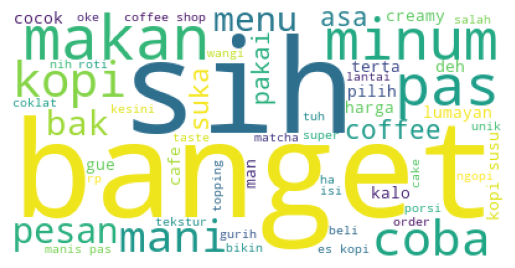

In [32]:
corpus = " ".join(df1['clean stopword'])
word_cloud = WordCloud(max_words=100, background_color='white', min_font_size=10).generate(corpus)
img = word_cloud.to_image()

fig = plt.figure(1)
plt.imshow(img)
plt.axis('off')
plt.show()

==============================================================================================

 Menampilkan Teks yang Telah Diproses


In [33]:
# Display text preproceseed
df1['text_preprocessed'][0]

'Food is excellent absolutely delicious The prices were reasonable and staff is sok friendly Makanan disini semua enak Makanan minuman semua punya rasa sendiri yang unik Koki pintar masak Chicken wings nagoya tebasaki enak Karaage gyudon jugaCafe vibes Jepang di Kelapa Gading Aku surah beberapa kali ke Kohicha Lokasi ada di ruko Gading Kirana dekat gerbang indomaret kembar Kali ini aku makan ber kita pesan Chicken nanban gohan ke nanban enak banget ayam gede di guyur mayo dan lemon asem segerin dan ayamnyq sudah dibumbui jadi merasuk disajikan dengan nasi porsi pas dan sayur serta jamur worth banget Chicken katsu curry ke porsi gede banget katsu tebal banget daging dijamin bakal puas banget dan sangat mengengkan curry bold and tasty Caesar salad ke sayur segar banget dilengkapi topping potongan ayam gede banget dan telur ini sih worth banget rasa juga segar dan cukup mengengkan untuk makanan sehat seperti inj Yuzu Lemon ice tea ke asem segar ala minuman sok refreshing Kiku Mint ke teh 

==============================================================================================

Menerapkan Simple Preprocessing pada Teks

Sintaks berikut digunakan untuk melakukan pra-pemrosesan sederhana pada teks di kolom `text_preprocessed` menggunakan fungsi `simple_preprocess` dari Gensim:


- df1.text_preprocessed: Mengambil kolom text_preprocessed yang berisi teks yang telah diproses sebelumnya.
- apply(gensim.utils.simple_preprocess): Menerapkan metode simple preprocessing dari Gensim untuk setiap teks dalam kolom. Fungsi ini akan:
  - Mengubah teks menjadi huruf kecil (lowercasing).
  - Menghapus tanda baca dan karakter khusus.
  - Memecah teks menjadi daftar kata (tokenization).
  
Hasil akhirnya disimpan dalam variabel text_reviews, yang berisi daftar kata-kata terpisah dari setiap teks yang telah diproses.

In [34]:
text_reviews = df1.text_preprocessed.apply(gensim.utils.simple_preprocess)
text_reviews

0       [food, is, excellent, absolutely, delicious, t...
1       [buka, dari, pagi, komplir, menu, sarapan, sam...
2       [toko, tuku, pertama, kali, di, cipete, ini, t...
3       [review, untuk, pesan, antar, via, gojek, atau...
4       [need, my, morning, coffee, cuzz, ke, kopi, se...
                              ...                        
1495    [pagi, pagi, menunggu, mall, buka, semua, jadi...
1496    [minimarket, tapi, rasa, kafe, alfax, sebuah, ...
1497    [salah, satu, kopi, terenak, di, scbd, tempat,...
1498    [diantara, dishes, yang, ada, di, starbucks, g...
1499    [saya, beberapa, kali, ke, starbucks, ini, kar...
Name: text_preprocessed, Length: 1500, dtype: object

Menerapkan Simple Preprocessing pada Teks yang Sudah Bersih dari Stopwords

Sintaks berikut digunakan untuk melakukan pra-pemrosesan sederhana pada teks yang telah dibersihkan dari stopwords menggunakan fungsi `simple_preprocess` dari Gensim:


In [35]:
text_reviews_stopped = df1['clean stopword'].apply(gensim.utils.simple_preprocess)
text_reviews_stopped

0       [food, is, excellent, absolutely, delicious, t...
1       [buka, pagi, komplir, menu, sarap, makan, sian...
2       [toko, tuku, cipete, terta, bedar, cabang, bak...
3       [review, pesan, via, gojek, takeaway, kopi, en...
4       [need, my, morning, coffee, cuzz, kopi, selama...
                              ...                        
1495    [pagi, pagi, tunggu, mall, buka, nongkrong, jc...
1496    [minimarket, kafe, alfax, buah, minimarket, sa...
1497    [salah, kopi, scbd, lumayan, comfy, indoor, ou...
1498    [dishes, starbucks, gue, suka, new, york, chee...
1499    [starbucks, salah, starbucks, term, jumat, sab...
Name: clean stopword, Length: 1500, dtype: object

==============================================================================================

## **6. Modeling**

### **6.1 Model 1 (Kolom Text Preprocessed)**

#### Membangun Model Word2Vec dengan parameter:
- Word2Vec: Kelas dari Gensim untuk membuat model Word2Vec.
- window=10: Menentukan jumlah kata di sekitar kata target yang akan diperhitungkan saat membangun vektor kata. Dalam hal ini, 10 kata di sebelah kiri dan kanan kata target.
- min_count=2: Hanya mempertimbangkan kata yang muncul minimal 2 kali dalam korpus. Ini berguna untuk mengabaikan kata-kata yang sangat jarang dan mengurangi kompleksitas model.
- alpha=0.11: Menentukan laju pembelajaran awal (learning rate) untuk model. Nilai ini mengontrol seberapa cepat model belajar dari data.
- seed=10: Menetapkan nilai acak untuk memastikan hasil yang konsisten saat menjalankan model berkali-kali.

In [36]:
# Model 1
model = Word2Vec(
    window=10,
    min_count=2,
    alpha=0.11,
    seed=10
    )

#### Membangun Kosakata untuk Model Word2Vec

Sintaks berikut digunakan untuk membangun kosakata (vocabulary) dari data yang telah diproses menggunakan model **Word2Vec**

model akan mengidentifikasi semua kata unik dari data dan menyimpannya untuk digunakan dalam pelatihan model.


In [37]:
model.build_vocab(text_reviews, progress_per=1000)


#### Melatih Model Word2Vec

Sintaks berikut digunakan untuk melatih model **Word2Vec** dengan data yang telah diproses

model akan belajar mengasosiasikan kata-kata satu sama lain berdasarkan konteks mereka dalam teks, menghasilkan vektor kata yang dapat digunakan untuk aplikasi NLP.

In [38]:
model.train(text_reviews, total_examples=model.corpus_count, epochs=model.epochs)


(1700458, 2198485)

#### Mencari Kata yang Paling Mirip dengan Word2Vec

Sintaks berikut digunakan untuk menemukan kata-kata yang paling mirip dengan kata "nyaman" dalam model **Word2Vec**:


In [39]:
model.wv.most_similar("nyaman")

[('pw', 0.6813517212867737),
 ('asyik', 0.6735429763793945),
 ('asik', 0.672146201133728),
 ('soresore', 0.6582518815994263),
 ('pewe', 0.6438744068145752),
 ('ngerjain', 0.6290806531906128),
 ('mendukung', 0.6267157793045044),
 ('internet', 0.6149081587791443),
 ('hutan', 0.6130527853965759),
 ('damai', 0.611923336982727)]

Penjelasan Hasil:

- Setiap tuple dalam hasil terdiri dari dua elemen: kata yang mirip dan nilai kemiripannya (skor antara 0 dan 1).
- Semakin tinggi nilai kemiripan, semakin dekat kata tersebut dalam konteks makna atau penggunaan.
- Kata-kata yang muncul, seperti 'crowded' dan 'comfy', menunjukkan bahwa model telah belajar asosiasi konteks yang relevan dari korpus data yang digunakan dalam pelatihan.
- Hasil ini berguna untuk memahami bagaimana kata "nyaman" berhubungan dengan kata lain dalam konteks yang lebih luas.

In [40]:
# melihat kata yang mirip dengan input bersih
model.wv.most_similar("espresso")

[('shot', 0.6204900741577148),
 ('syrup', 0.6094390153884888),
 ('acid', 0.6028398871421814),
 ('distilled', 0.5898092985153198),
 ('creamer', 0.5868032574653625),
 ('blend', 0.5853399634361267),
 ('menghasilkan', 0.5744392275810242),
 ('tonic', 0.5707843899726868),
 ('robusta', 0.5698467493057251),
 ('oatside', 0.569245457649231)]

In [41]:
model.wv.most_similar("makan")

[('kesana', 0.4563080668449402),
 ('dipegang', 0.4545782506465912),
 ('minum', 0.4367731511592865),
 ('ngedessert', 0.4314611256122589),
 ('pengajian', 0.4307265281677246),
 ('laper', 0.4199802279472351),
 ('manja', 0.3868931829929352),
 ('ngemil', 0.38583794236183167),
 ('ngopi', 0.3833692669868469),
 ('lapar', 0.3807852864265442)]

#### Menghitung Kemiripan Antara Dua Kata

Sintaks berikut digunakan untuk menghitung tingkat kemiripan antara dua kata, "tebet" dan "cipete", menggunakan model **Word2Vec**:


In [42]:
model.wv.similarity(w1="tebet", w2="cipete")

0.6902312

- Nilai **0.5566** menunjukkan bahwa terdapat tingkat kemiripan yang moderat antara kedua kata tersebut.
- Skor ini berada di antara 0 dan 1, yang berarti bahwa "tebet" dan "cipete" memiliki beberapa kesamaan dalam konteks penggunaannya, meskipun tidak identik.
- Nilai ini bisa menunjukkan bahwa kedua kata mungkin berkaitan dengan konsep atau lokasi yang sama, tergantung pada konteks korpus yang digunakan untuk pelatihan model.

Hasil ini berguna untuk memahami hubungan semantik antara dua kata dalam konteks yang lebih luas.

==============================================================================================

### **6.2 Model 2 (Kolom Clean Stopword)**

Kita akan membuat model kedua yaitu menggunakan vobulary berdasarkan kolom Clean Stopword

In [43]:
# Model 2
model_2 = Word2Vec(
    window=10,
    min_count=2,
    alpha=0.15,
    seed=10
)

Selanjutnya membuat vocabulary untuk model 2

In [44]:
model_2.build_vocab(text_reviews_stopped, progress_per=1000)


Melakukan train terhadap model 2

In [45]:
model_2.train(text_reviews_stopped, total_examples=model_2.corpus_count, epochs=model_2.epochs)


(1070353, 1289785)

==============================================================================================

Setelah melakukan train kita akan melakukan pengecekan model untuk melihat kemiripan kata

In [46]:
model_2.wv.most_similar("latte")

[('tega', 0.4971228241920471),
 ('krasa', 0.4859233796596527),
 ('caribbean', 0.4834875762462616),
 ('latterasa', 0.48115503787994385),
 ('lattekopi', 0.4687378406524658),
 ('butterscotch', 0.44044387340545654),
 ('oz', 0.43668755888938904),
 ('cappucinno', 0.4291872978210449),
 ('bitterness', 0.4288552403450012),
 ('latteidr', 0.4252678453922272)]

In [47]:
model_2.wv.most_similar("bersih")

[('stopkontak', 0.6035947799682617),
 ('mushola', 0.5781691670417786),
 ('toilet', 0.5776536464691162),
 ('mandi', 0.5643312335014343),
 ('kamar', 0.5221698880195618),
 ('fotofoto', 0.5141471028327942),
 ('tunjang', 0.5059780478477478),
 ('kotor', 0.4935179650783539),
 ('jelasin', 0.4884185492992401),
 ('gercep', 0.48596319556236267)]

In [48]:
model_2.wv.similarity(w1="makan", w2="rokok")

-0.013640732

Setelah melakukan pengecekan :

- Kita bisa melihat bahwa saat menggunakan kata latte yang muncul dengan nilai kemiripan tertinggi adalah kata oat.
- Setelah melakukan input dengan kata bersih kita bisa melihat bahwa kata stopkontak mempunyai nilai kemiripan tertinggi dengan kata bersih
- kita bisa melihat bahwa makan dan rokok mempunyai nilai yang kecil

==============================================================================================

### **6.3 Perbandingan dua model**

Fungsi di bawah di gunakan untuk mencoba kedua model

In [49]:
# Function Uji Coba
def testing_similar(text):
  res_1 = model.wv.most_similar(text)
  res_2 = model_2.wv.most_similar(text)
  print('Hasil Model 1 :',res_1)
  print('Hasil Model 2 :',res_2)

In [50]:
testing_similar("segar")

Hasil Model 1 : [('nyegerin', 0.6779065132141113), ('asem', 0.6653982400894165), ('semangka', 0.648356556892395), ('seger', 0.6381472945213318), ('yakult', 0.6266288161277771), ('lemon', 0.6091227531433105), ('kecut', 0.5925498604774475), ('menyegarkan', 0.5903277397155762), ('squash', 0.5885729193687439), ('markisa', 0.5767176747322083)]
Hasil Model 2 : [('nyegerin', 0.590661346912384), ('sparkling', 0.5840718150138855), ('blackcurrant', 0.5824453234672546), ('sonkit', 0.5797114968299866), ('kasem', 0.5556654930114746), ('kiwi', 0.5416586995124817), ('seger', 0.5210778117179871), ('dahaga', 0.5200566053390503), ('yakult', 0.5189208984375), ('kunyit', 0.5183567404747009)]


Pada percobaan pertama, menurut kami model 1 lebih memperlihatkan kemiripan kata dengan target kata yang telah di input sebelumnya, "segar".

Kami akan mencoba kembali model dengan kata lain.

In [51]:
testing_similar("murah")

Hasil Model 1 : [('wajar', 0.6649884581565857), ('terjangkau', 0.6615562438964844), ('pajak', 0.6379704475402832), ('pricey', 0.619912326335907), ('affordable', 0.6182836890220642), ('reasonable', 0.6158332824707031), ('seharga', 0.6150442361831665), ('pricely', 0.6011726260185242), ('mahal', 0.5974130630493164), ('kemahalan', 0.586005687713623)]
Hasil Model 2 : [('standart', 0.6230118274688721), ('worth', 0.6002807021141052), ('mahal', 0.5913492441177368), ('worthit', 0.586573600769043), ('gimanadia', 0.584567666053772), ('pajak', 0.5563854575157166), ('gimanagak', 0.5541402101516724), ('pricey', 0.5526728630065918), ('sihrasa', 0.5509623289108276), ('segitu', 0.550358235836029)]


In [52]:
testing_similar("kopi")

Hasil Model 1 : [('mandja', 0.5520398020744324), ('paradista', 0.5477907657623291), ('lurah', 0.5144800543785095), ('arabica', 0.4871159791946411), ('batavia', 0.47429779171943665), ('anteng', 0.46474170684814453), ('kito', 0.4620877206325531), ('espresso', 0.461858868598938), ('perbandingan', 0.45748212933540344), ('robusta', 0.4505992531776428)]
Hasil Model 2 : [('coklatt', 0.5709899067878723), ('kitkatt', 0.5525012612342834), ('awan', 0.503314197063446), ('arabica', 0.4999377131462097), ('teguk', 0.4979601502418518), ('kopia', 0.4975093603134155), ('netral', 0.48216044902801514), ('guyu', 0.4672130346298218), ('watery', 0.46524572372436523), ('djawa', 0.4572833776473999)]


In [53]:
testing_similar("kantor")

Hasil Model 1 : [('mrt', 0.615140438079834), ('tujuanku', 0.5836049318313599), ('letak', 0.582184910774231), ('pejaten', 0.5786128640174866), ('perkantoran', 0.5743734836578369), ('lege', 0.5699968338012695), ('posisi', 0.5680676102638245), ('masjid', 0.5562899708747864), ('pertandingan', 0.5514551997184753), ('cipete', 0.5485353469848633)]
Hasil Model 2 : [('yasudah', 0.6353242993354797), ('inn', 0.5421215295791626), ('macet', 0.532526969909668), ('center', 0.5322659611701965), ('busway', 0.5214009284973145), ('pejaten', 0.5176801681518555), ('mal', 0.5152910351753235), ('ashta', 0.5128793716430664), ('gajauh', 0.5107924938201904), ('nyebrang', 0.49763748049736023)]


In [54]:
testing_similar ("americano")

Hasil Model 1 : [('cappuccino', 0.5942285656929016), ('cappucino', 0.48816031217575073), ('cotecube', 0.47360724210739136), ('hak', 0.47054576873779297), ('cangkir', 0.4658219814300537), ('beans', 0.462205171585083), ('cappucinno', 0.4600836932659149), ('gaol', 0.4528617858886719), ('juno', 0.4521876573562622), ('kopimenu', 0.44932490587234497)]
Hasil Model 2 : [('cappuccino', 0.5215103626251221), ('lattee', 0.5164406299591064), ('stronger', 0.5120068192481995), ('damage', 0.47857484221458435), ('elder', 0.47820156812667847), ('beans', 0.47150009870529175), ('robusta', 0.46059390902519226), ('kafein', 0.460103303194046), ('fruity', 0.45374417304992676), ('kick', 0.45100119709968567)]


In [55]:
testing_similar ('makan')

Hasil Model 1 : [('kesana', 0.4563080668449402), ('dipegang', 0.4545782506465912), ('minum', 0.4367731511592865), ('ngedessert', 0.4314611256122589), ('pengajian', 0.4307265281677246), ('laper', 0.4199802279472351), ('manja', 0.3868931829929352), ('ngemil', 0.38583794236183167), ('ngopi', 0.3833692669868469), ('lapar', 0.3807852864265442)]
Hasil Model 2 : [('bibimbap', 0.37340477108955383), ('dimaum', 0.36811959743499756), ('maccaroni', 0.3668915331363678), ('ngelaptop', 0.36652785539627075), ('lapar', 0.36092808842658997), ('variasi', 0.3585953116416931), ('apaapa', 0.3569978177547455), ('inioverall', 0.35549044609069824), ('tekwan', 0.3542524576187134), ('lontong', 0.34927576780319214)]


In [56]:
testing_similar("cozy")

Hasil Model 1 : [('man', 0.6524909138679504), ('pewe', 0.6073725819587708), ('homey', 0.6066602468490601), ('sound', 0.5833067893981934), ('asik', 0.5710569024085999), ('ngumpul', 0.563795268535614), ('nyaman', 0.5539466142654419), ('comfy', 0.5495073199272156), ('minimalis', 0.545183539390564), ('charger', 0.5416919589042664)]
Hasil Model 2 : [('comfy', 0.5343879461288452), ('agna', 0.5343326330184937), ('nyaman', 0.5062379240989685), ('kumpulkumpul', 0.5032670497894287), ('bangettempat', 0.4753292500972748), ('ngumpul', 0.47033610939979553), ('arisan', 0.46637845039367676), ('kopitempat', 0.46379733085632324), ('minimalist', 0.4545934200286865), ('homey', 0.45384180545806885)]




Setelah melakukan beberapa kali percobaan dan evaluasi, kami menyimpulkan bahwa **Model 1** merupakan model terbaik dalam mencari kata-kata yang mirip dengan target input dibandingkan dengan **Model 2**. Hal ini terlihat dari kemampuannya dalam menangkap makna dan konteks kata yang lebih akurat.

#### Justifikasi Pemilihan Model 1
1. **Akurasi Kemiripan yang Lebih Baik**: Model 1 mampu menangkap kata-kata yang relevan dengan input pengguna lebih baik dibandingkan Model 2. Dalam kasus percobaan, Model 1 dapat mengenali kata-kata yang lebih dekat secara semantis dengan input target.
   
2. **Threshold Kemiripan**: Dari evaluasi, kami menetapkan bahwa hanya kemiripan dengan skor di atas 40% yang akan digunakan. Jika kemiripan di bawah 40%, model cenderung mengembalikan kata-kata yang tidak relevan. Sebagai contoh, ketika input adalah kata "makan", dan jika angka similarity di bawah 40%, model mulai mengembalikan kata-kata seperti "beku" atau "lembut", yang kurang relevan dengan konsep "makan".

3. **Contoh Kasus**: Dalam kasus penggunaan kata kunci seperti "makan", Model 1 secara konsisten memberikan hasil yang lebih relevan. Ketika similarity di bawah threshold 40%, hasil yang diberikan sudah cenderung tidak terkait dengan kata input, sehingga nilai ambang batas ini dipilih untuk menjaga relevansi hasil rekomendasi.

Oleh karena itu, kami memutuskan untuk menggunakan **Model 1** sebagai model yang dipilih, dengan aturan bahwa hanya kata-kata dengan kemiripan lebih dari 40% yang akan digunakan dalam rekomendasi, dan kemiripan di bawah angka tersebut akan diabaikan untuk menjaga relevansi.


==============================================================================================

## **6.4 Model simulation**

Pada bagian ini, kami akan mencoba terlebih dahulu model menggunakan fungsi input_user. Argumen/attribute yang di gunakan untuk fungsi ini adalah harga, daerah, cuisine, text1, text2, text3, dan fasilitas. Untuk fasilitas sendiri akan di set default sebagai None.


In [57]:
def input_user(harga, daerah, cuisine, text1, text2, text3, fasilitas=None):
    # Memfilter data berdasarkan kriteria dengan partial matching untuk 'full_address' dan case-insensitive untuk 'cuisine'
    if harga < 20000:
        print("Harga tidak boleh kurang dari 20.000")
        return ""  # Mengembalikan string kosong jika harga kurang dari 20.000

    data_1 = df1[
        (df1['price_from'] <= harga) &  # Format minimum harga yang akan dibelanjakan
        (df1['full_address'].str.contains(daerah, case=False, na=False)) &  # Partial match tanpa case-sensitive
        (df1['cuisine'].str.lower() == cuisine.lower())  # Memfilter berdasarkan cuisine tanpa case-sensitive
    ]

    # Pemetaan fasilitas dari nama yang lebih sederhana ke kolom DataFrame
    fasilitas_mapping = {
        'smoking area': 'smoking_area_available',
        'outdoor seat': 'outdoor_seat_available',
        'full time': 'full_time_available',
        'vip room': 'vip_room_available',
        'reservation': 'reservation_available',
        'parking area': 'parking_area_available'
    }

    # Menambahkan filter untuk fasilitas jika ada
    if fasilitas is not None:
        for fasilitas_item in fasilitas:
            fasilitas_item_lower = fasilitas_item.lower()  # Menjadikan huruf kecil untuk memudahkan pencocokan
            if fasilitas_item_lower in fasilitas_mapping:
                data_1 = data_1[data_1[fasilitas_mapping[fasilitas_item_lower]] == True]

    # Jika tidak ada data yang cocok, kembalikan string kosong
    if data_1.empty:
        return ""  # Mengembalikan string kosong jika tidak ada data yang cocok

    # List untuk menyimpan kata mirip
    all_similar_word = []

    # Define top n word
    topn = 5

    # Cek kata pertama dan cari similar words
    if text1 in model.wv:
        res_1 = model.wv.most_similar(text1, topn=topn)
        all_similar_word.extend([word[0] for word in res_1 if word[1] > 0.4])

    # Cek kata kedua
    if text2 in model.wv:
        res_2 = model.wv.most_similar(text2, topn=topn)
        all_similar_word.extend([word[0] for word in res_2 if word[1] > 0.4])

    # Cek kata ketiga
    if text3 in model.wv:
        res_3 = model.wv.most_similar(text3, topn=topn)
        all_similar_word.extend([word[0] for word in res_3 if word[1] > 0.4])

    # Hilangkan kata duplikat
    all_similar_word = list(set(all_similar_word))

    # List untuk menyimpan hasil score similarity
    nilai_similarity = []

    # Menghitung similarity score berdasarkan kata-kata mirip
    for review in data_1['clean stopword']:
        score = 0
        for word in all_similar_word:
            score += review.count(word)  # Menghitung kemunculan kata mirip dalam review
        nilai_similarity.append(score)

    # Menambahkan similarity score ke dalam DataFrame
    data_1 = data_1.copy()  # Buat salinan untuk menghindari SettingWithCopyWarning
    data_1['similarity_score'] = nilai_similarity

    # Memfilter hanya review dengan similarity_score > 0
    data_1 = data_1[data_1['similarity_score'] > 0]

    # Mengembalikan hasil dalam bentuk paragraf
    if data_1.empty:
        return ""  # Kembalikan string kosong jika tidak ada review yang cocok

    # Mengambil review teratas
    top_reviews = data_1.sort_values(by='similarity_score', ascending=False).head(5)

    # Format output sesuai dengan permintaan
    output_list = []
    for _, row in top_reviews.iterrows():
        # Menyiapkan kolom boolean yang akan ditampilkan
        facilities = []
        if row['wifi_available']:
            facilities.append("WiFi")
        if row['outdoor_seat_available']:
            facilities.append("Outdoor Seat")
        if row['full_time_available']:
            facilities.append("Full Time")
        if row['vip_room_available']:
            facilities.append("VIP Room")
        if row['reservation_available']:
            facilities.append("Reservation")
        if row['parking_area_available']:
            facilities.append("Parking Area")

        # Membuat output untuk setiap baris
        output = (
            f"Nama Kafe: {row['title']}, rating: {row['rate']}/5\n"
            f"Alamat lengkap: {row['full_address']}\n"
            f"Jam Buka: {row['opening_hours']}\n"
            f"Harga: Rp. {row['price_from']} - Rp. {row['price_till']}\n"
            f"Fasilitas: {', '.join(facilities)}\n"
            f"Review: {row['review']}\n"  # Menggunakan 'clean stopword' sebagai review
        )
        output_list.append(output)

    return "\n".join(output_list)  # Mengembalikan hasil sebagai string


Fungsi input_user

Fungsi ini memfilter data restoran atau kafe berdasarkan beberapa kriteria: harga, lokasi, jenis makanan (cuisine), dan fasilitas yang tersedia. Fungsi juga menghitung similarity score antara review pengguna dengan kata-kata yang mirip menggunakan model1 Word2Vec. Langkah-langkahnya adalah:

1. Validasi Harga: Memastikan harga tidak kurang dari 20.000. Jika kurang, fungsi mengembalikan DataFrame kosong.
2. Filter Data: Memilih data yang sesuai dengan:
  - Harga maksimum.
  - Alamat sesuai dengan daerah (partial match case-insensitive).
  - Jenis makanan (case-insensitive).
3. Fasilitas: Jika fasilitas tertentu diinginkan, data difilter berdasarkan fasilitas yang tersedia (misalnya, smoking area atau parking area).
4. Word2Vec Similarity: Fungsi mencari kata-kata mirip berdasarkan input (text1, text2, text3) menggunakan model Word2Vec, kemudian menghitung berapa kali kata-kata mirip tersebut muncul dalam review.
5. Sorting: Data diurutkan berdasarkan similarity score dan dikembalikan 5 teratas.

Output akhir adalah data kafe atau restoran yang memiliki review paling mirip dengan input pengguna.

In [58]:
print(input_user(
    harga=500000,
    daerah="menteng",
    cuisine="kafe",
    text1="americano",
    text2="buah",
    text3="sedap",
    fasilitas=["smoking area",
    "outdoor seat"]
    ))

Nama Kafe: Butteria Menteng, rating: 3.99/5
Alamat lengkap: Menteng, Jl. HOS Cokroaminoto No. 54, Menteng, Jakarta Pusat
Jam Buka: Senin - Minggu (10:00 - 22:00)
Harga: Rp. 100000.0 - Rp. 200000.0
Fasilitas: Outdoor Seat, Reservation, Parking Area
Review: Ke butteria menteng, hanya karena craving for tiramisu nya. Suasanya lebih enak daripada yang di Butteria PIM ya. Jadi saya pesan tiramisu nya. Menurut saya enak dan tdk overwhekmed dgn susu.For sure, Everyone's got their favorite version of the classic dessert, klo aku suka yang;Serba hijau dan orange interior Butteria, ruang duduk indoor ada dua bagian, di lantai satu dan lantai dua, adem dan ngga terlalu luas. Menuju lantai dua harus melewati smoking area yang fotoable dulu, decornya nampak seru.Pelayanan bagus, staff ramah semua kecuali resepsionis di depan, kurang sabar waktu saya datang bareng teman dan orang tuanya, minta kita buru buru duduk dan jutek saat ditanyai produk.Untungnya pesanan saya, Hot Cocoa -58rb, enak, bold dan

Berdasarkan hasil yang di dapat, model telah berfungsi dengan baik dan dapat memberikan rekomendasi yang tepat.

## **7. Model Saving**

Setelah model **Word2Vec** dilatih, kita dapat menyimpannya menggunakan model tersebut

dari kedua model yang telah dilatih, hasil dari perbandingan model tersebut model pertama lebih baik dibandingkan dengan model yang kedua maka kita menyimpan model yang pertama

In [59]:
# Contoh jika model adalah Word2Vec
model.save("word2vec_model.model")

## **8. Conclusion & Next Improvement**

Proyek ini berhasil membangun model rekomendasi kafe berbasis NLP yang dapat memberikan rekomendasi berdasarkan lokasi, fasilitas, dan kata kunci yang diinginkan. Dengan menggunakan teknik seperti stemming, tokenisasi, Word2Vec, dan visualisasi WordCloud, kami mampu menghasilkan hasil yang relevan dengan harapan pengguna.

Improvement yang bisa di lakukan di kemudian hari adalah:


1. Peningkatan Akurasi Model
Meskipun Word2Vec dapat memahami hubungan antar kata, menggunakan teknik pemodelan yang lebih canggih seperti **BERT (Bidirectional Encoder Representations from Transformers)** dapat membantu model menangkap konteks yang lebih mendalam dari ulasan. BERT mampu memahami kata dalam konteks kalimat, sehingga dapat memberikan rekomendasi yang lebih akurat.

2. Penambahan Fitur Tambahan
Menambahkan fitur-fitur tambahan seperti **rating pelanggan**, **jumlah kunjungan**, atau **waktu buka kafe** dapat memperkaya model dan membuat rekomendasi lebih relevan. Misalnya, kafe dengan rating tinggi mungkin lebih diprioritaskan dalam hasil rekomendasi.

3. Pengembangan Sistem Filter yang Lebih Fleksibel
Saat ini, pengguna hanya bisa memfilter berdasarkan lokasi, fasilitas, dan kata kunci. Pengembangan lebih lanjut bisa mencakup **filter berdasarkan budget**, **menu makanan/minuman tertentu**, atau **waktu operasional**. Ini akan membuat pengalaman pengguna lebih personal.

4. Integrasi dengan API atau Data Real-Time
Mengintegrasikan sistem dengan **Google Places API** atau **platform media sosial** untuk mendapatkan data ulasan real-time dan lebih up-to-date dapat meningkatkan kualitas rekomendasi. Hal ini memungkinkan pengguna mendapatkan rekomendasi yang lebih relevan dan terkini.

